<a href="https://colab.research.google.com/github/priyachittamuru/logistic_regression/blob/main/Dry_bean_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dry Bean Dataset Classification**
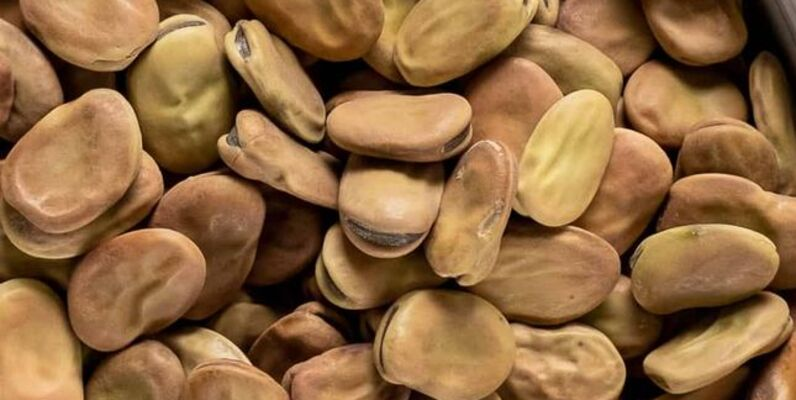

##**About Dataset**
**Relevant Information:**
Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

In [43]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn. preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [44]:
#Reading the dataset
data = pd.read_csv("/content/Dry_Bean_Dataset.csv")

In [45]:
#Printing the dataset
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [46]:
##finding the datatypes,colums and rows /information of the data provided
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

From the info we can see
1. The data has 13611 rows and 16 columns
2. There are no null values but has a colomn with categorial data




In [47]:
#finding the mean,Standard deviation ,count, median for columns
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


1. From describing data we can see most colomns have a vast diff between 75%(upper quartile region) and max (outer extreme) so there might be outliers present
2. So plotting histogram and boxplot for numerical colomns is neccasary for further analysis



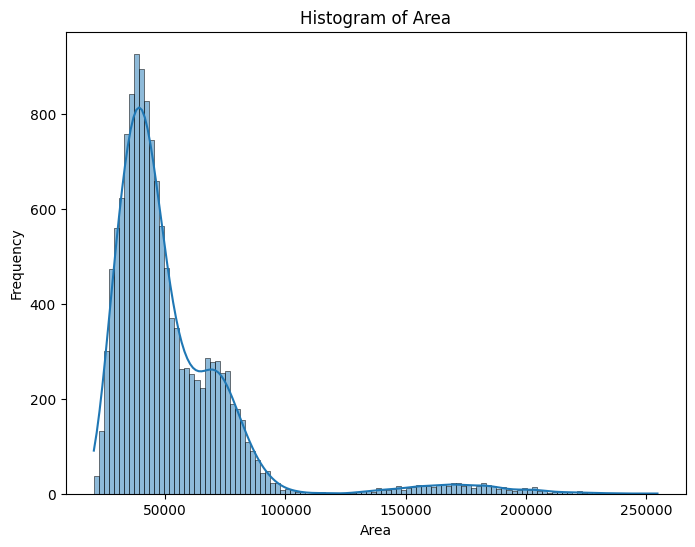

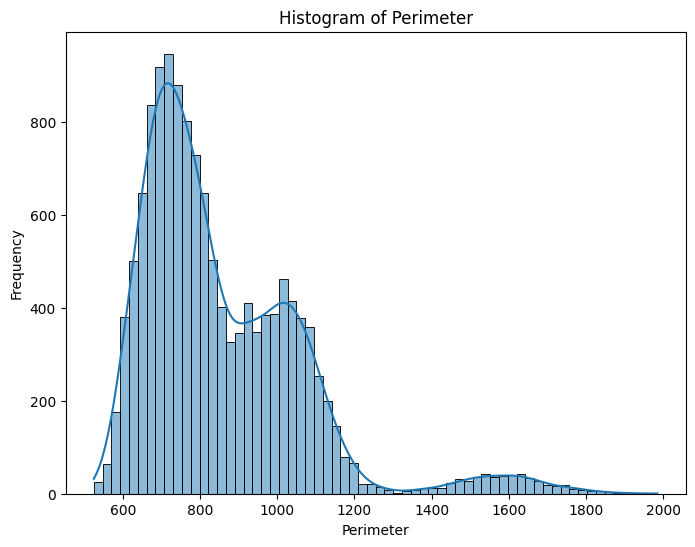

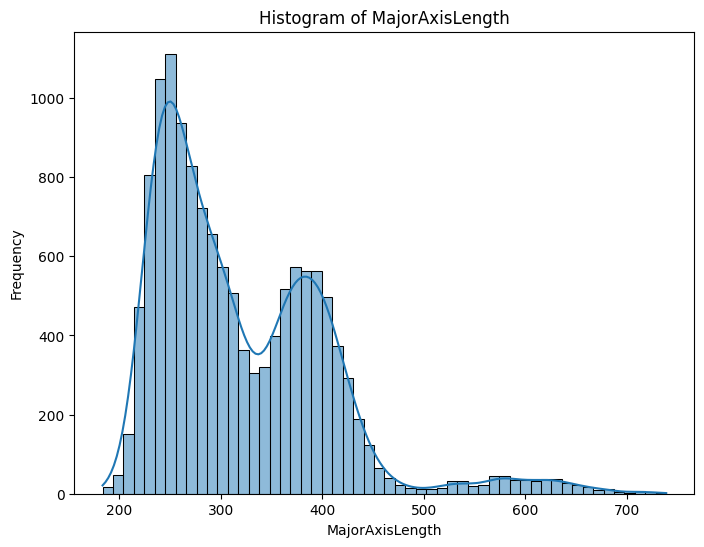

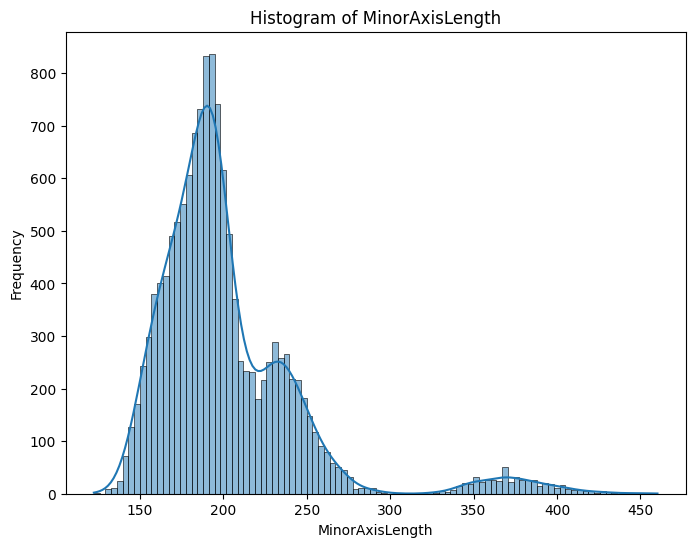

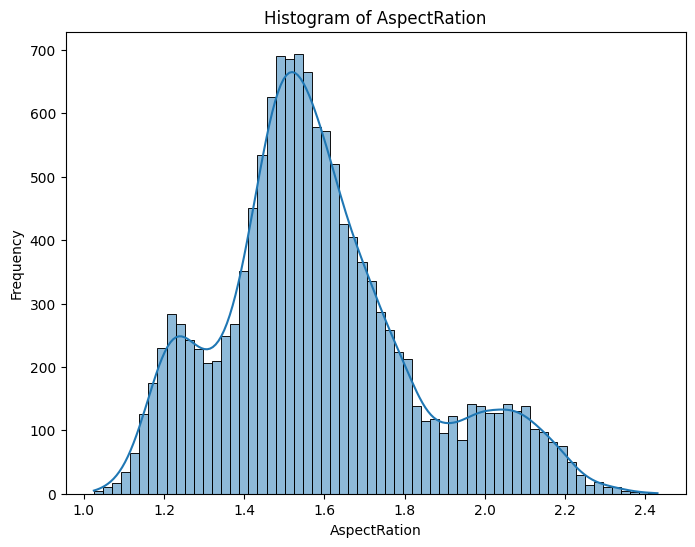

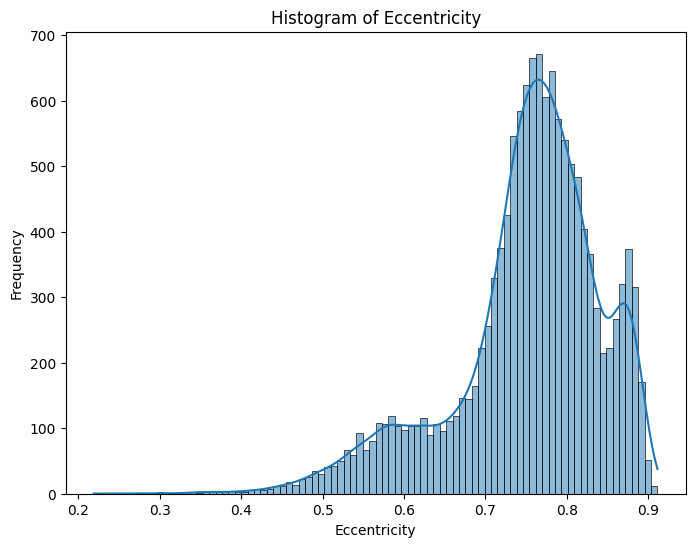

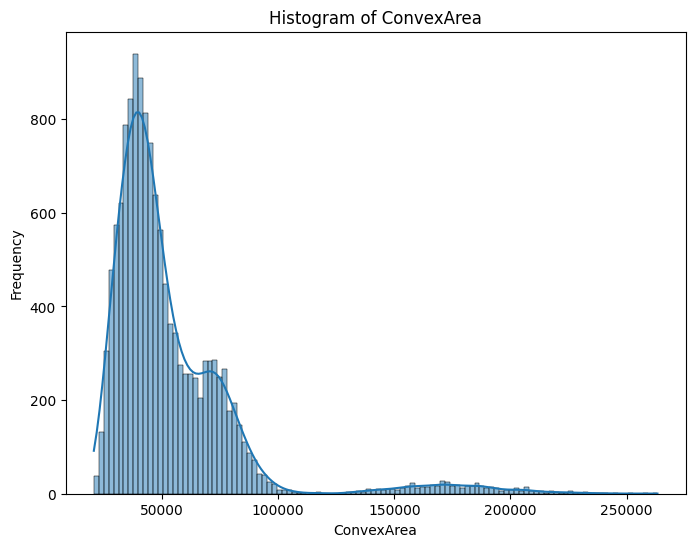

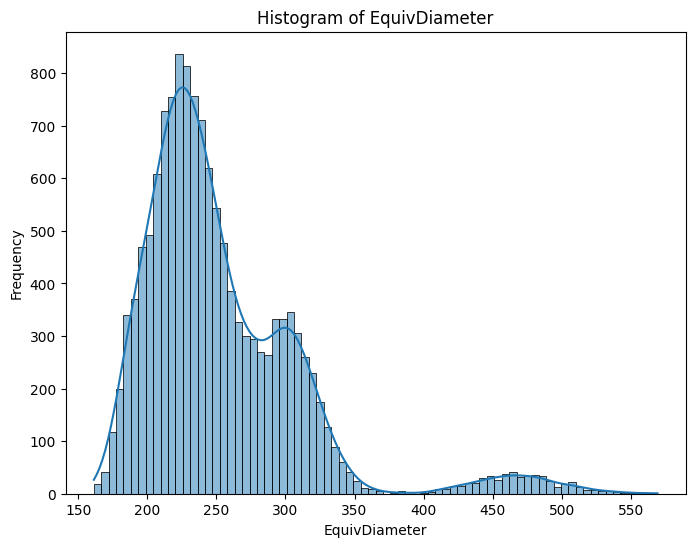

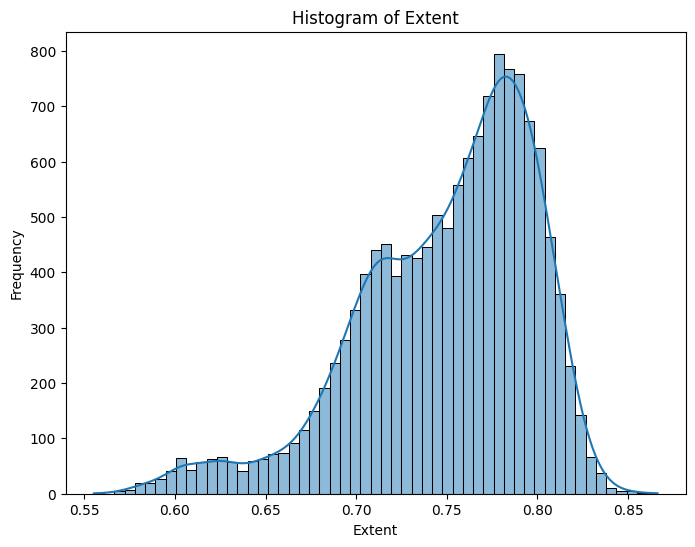

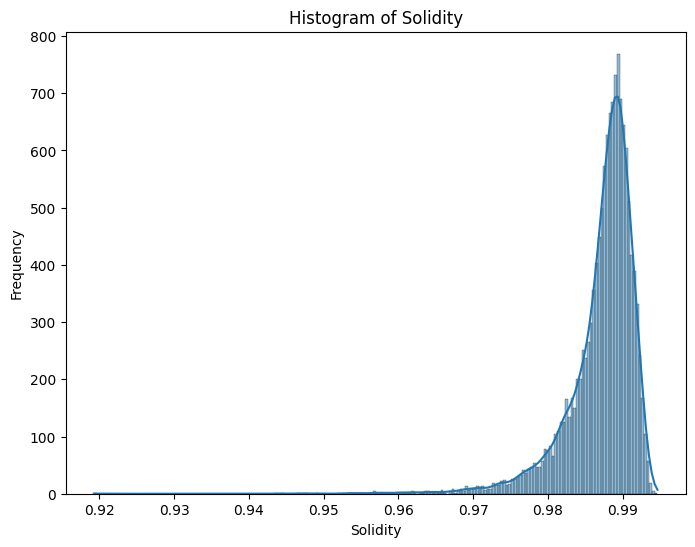

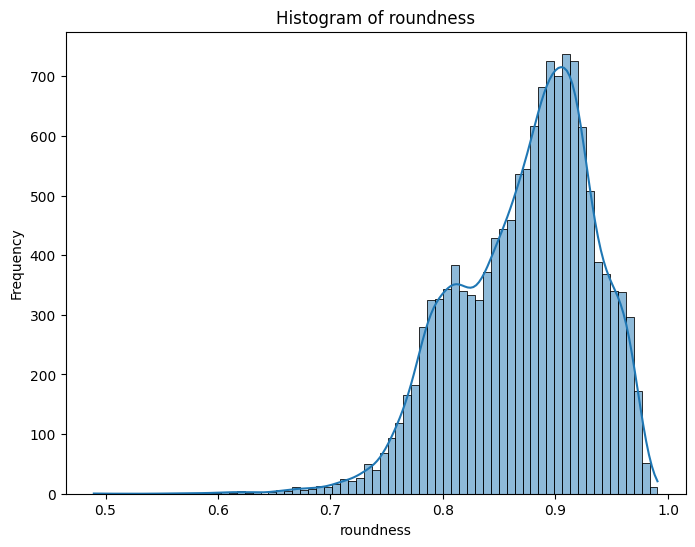

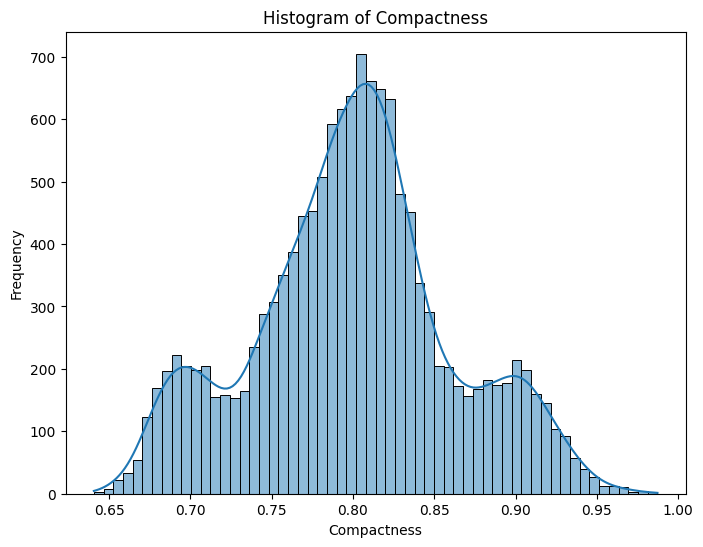

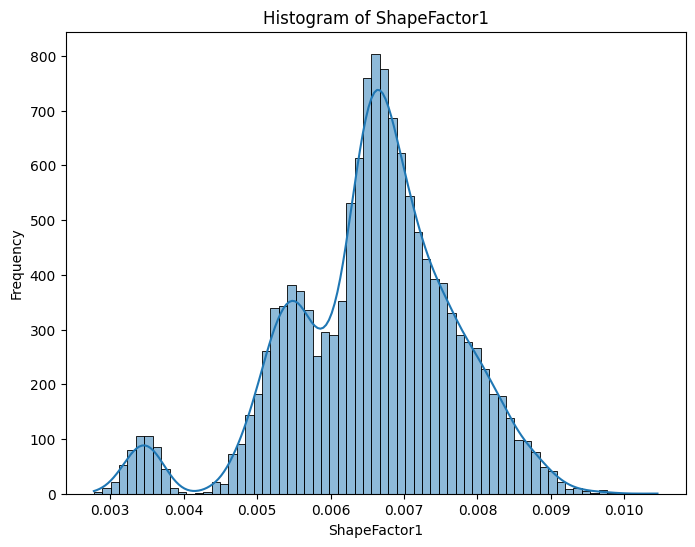

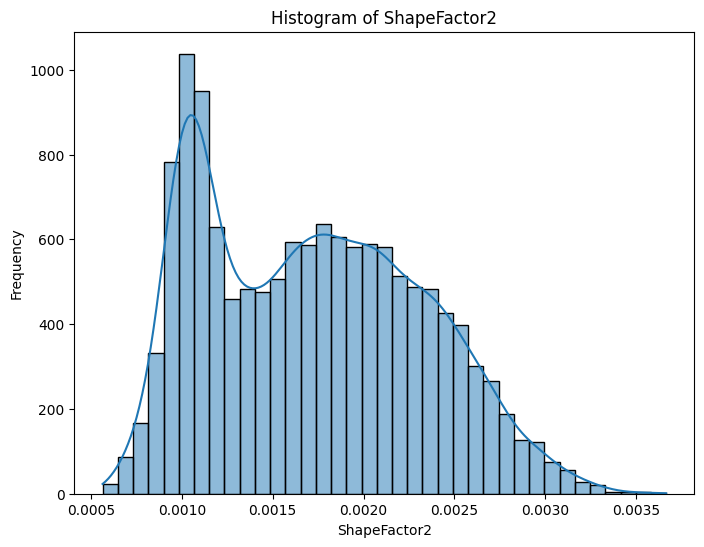

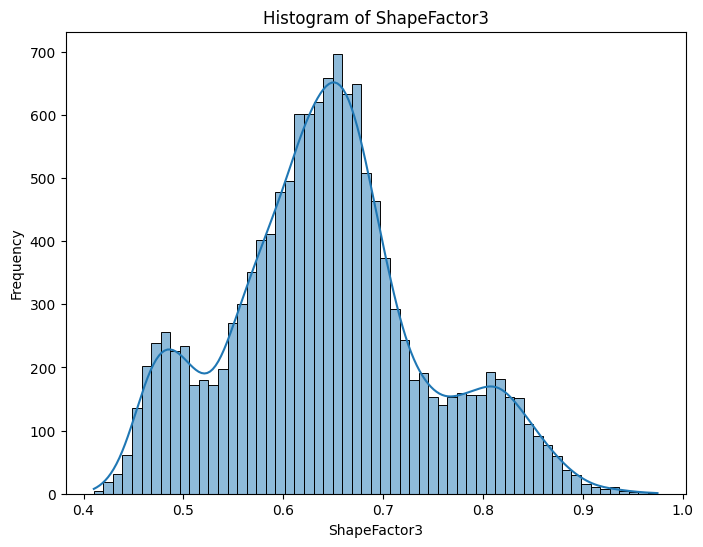

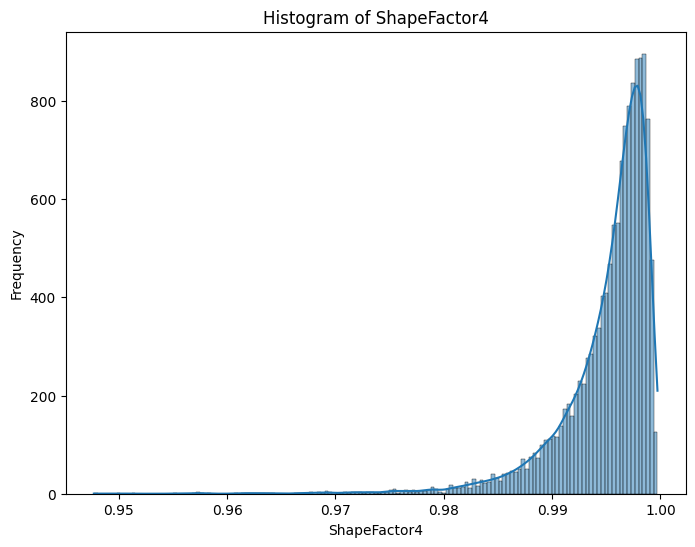

In [48]:
#Histogram for numerical colomns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)  # Added KDE for better visualization
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

1. Area
 1. The area ranges from approximately 28,000 to 37,000.

 2. The highest frequency is observed around 31,000 to 32,000, with a count of approximately 120. The distribution appears slightly right-skewed, with fewer instances of larger areas.

2. Perimeter
  1. The perimeter ranges from about 600 to 700.

  2.  The most frequent perimeter values are around 630 to 650, with a peak frequency of approximately 100. The distribution is roughly symmetric with a slight right skew.

3. MajorAxisLength
  1. The major axis length ranges from approximately 200 to 250.

  2. The highest frequency occurs around 210 to 220, with a count of about 100. The distribution is slightly right-skewed, indicating fewer instances of longer major axis lengths.

4. MinorAxisLength
  1. The minor axis length ranges from about 170 to 200.

  2. The peak frequency is around 180 to 190, with a count of approximately 120. The distribution is roughly symmetric.

5. AspectRation
   1. The aspect ratio ranges from approximately 1.04 to 1.42.

   2. The most common aspect ratio is around 1.15 to 1.20, with a frequency of about 100. The distribution is right-skewed, with fewer instances of higher aspect ratios.

6. Eccentricity
  1. The eccentricity ranges from about 0.29 to 0.71.

  2. The highest frequency is observed around 0.50 to 0.55, with a count of approximately 100. The distribution is slightly right-skewed.

7. ConvexArea
  1. The convex area ranges from approximately 28,000 to 38,000.

  2. The peak frequency occurs around 31,000 to 32,000, with a count of about 120. The distribution is slightly right-skewed.

8. EquivDiameter
   1. The equivalent diameter ranges from about 190 to 215.

   2. The most frequent values are around 200 to 205, with a count of approximately 120. The distribution is roughly symmetric.

9. Extent
  1. The extent ranges from approximately 0.74 to 0.81.

  2. The highest frequency is around 0.77 to 0.78, with a count of about 100. The distribution is roughly symmetric.

10. Solidity
   1. The solidity ranges from about 0.98 to 0.99.

  2.  The peak frequency occurs around 0.988 to 0.990, with a count of approximately 200. The distribution is left-skewed, indicating fewer instances of lower solidity values.

11. Roundness
  1. The roundness ranges from approximately 0.85 to 0.99.

  2. The most frequent roundness values are around 0.95 to 0.97, with a count of about 150. The distribution is slightly left-skewed.

12. Compactness
  1. The compactness ranges from about 0.85 to 0.98.

  2. The highest frequency is observed around 0.91 to 0.93, with a count of approximately 120. The distribution is roughly symmetric.

13. ShapeFactor1
  1. The shape factor 1 ranges from approximately 0.006 to 0.007.

  2. The peak frequency occurs around 0.0067 to 0.0069, with a count of about 150. The distribution is slightly right-skewed.

14. ShapeFactor2
  1. The shape factor 2 ranges from about 0.002 to 0.0036.

  2. The most frequent values are around 0.0028 to 0.0030, with a count of approximately 120. The distribution is roughly symmetric.

15. ShapeFactor3
  1. The shape factor 3 ranges from approximately 0.72 to 0.96.

  2. The highest frequency is around 0.84 to 0.88, with a count of about 100. The distribution is slightly right-skewed.

16. ShapeFactor4
  1. The shape factor 4 ranges from about 0.99 to 1.00.

  2. The peak frequency occurs at 0.998 to 1.000, with a count of approximately 300. The distribution is left-skewed, indicating fewer instances of lower shape factor 4 values.

**Summary**

* Features like Solidity and ShapeFactor4 are heavily concentrated towards higher values, indicating uniformity in these traits among the beans.

* Features like Area, Perimeter, and MajorAxisLength show slight right skewness, suggesting fewer instances of larger values.

* The histograms provide a clear visual representation of the distribution of each feature, highlighting common values and outliers.

* This analysis helps in understanding the variability and distribution of the features in the Dry Bean Dataset.



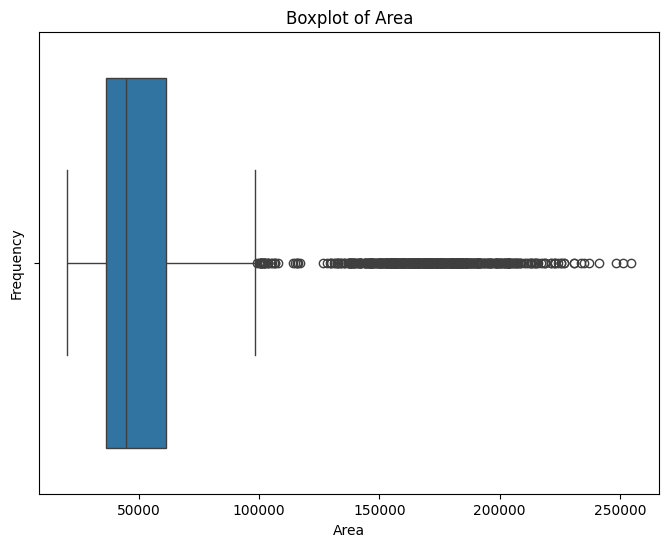

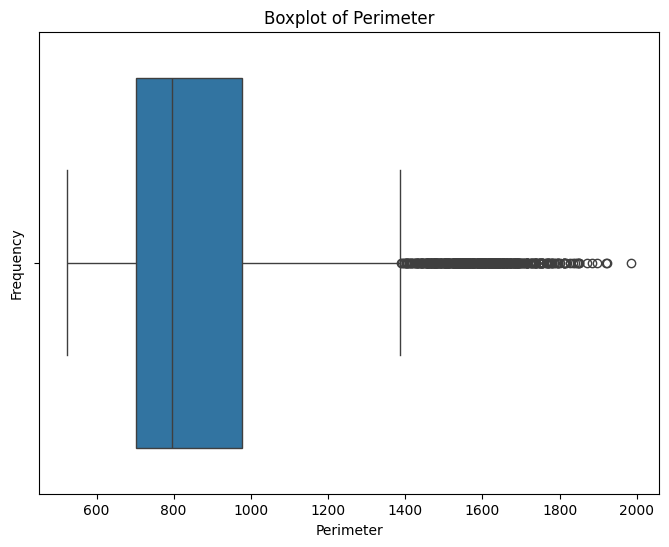

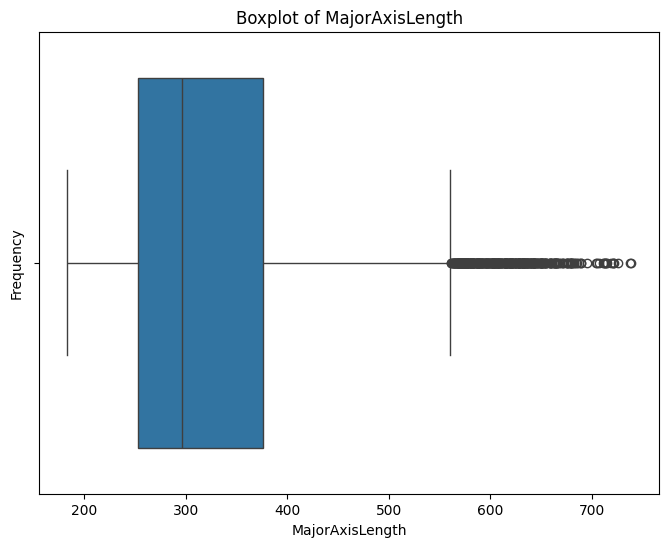

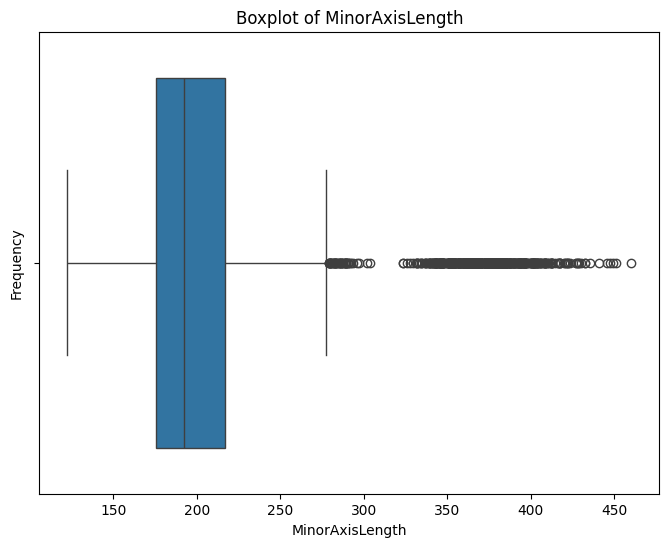

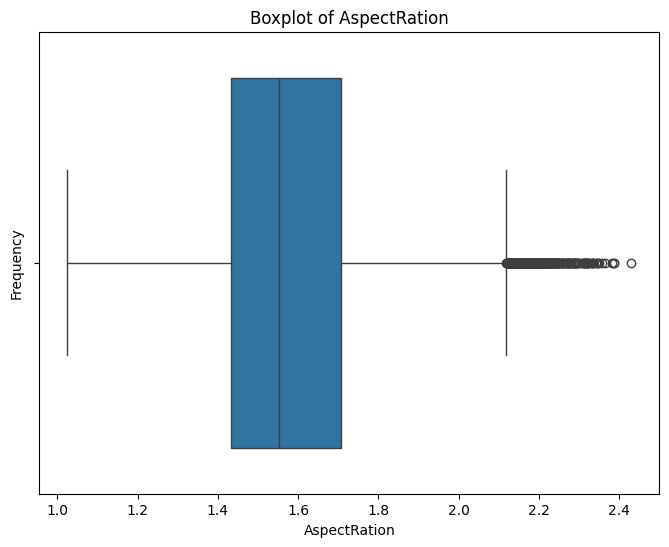

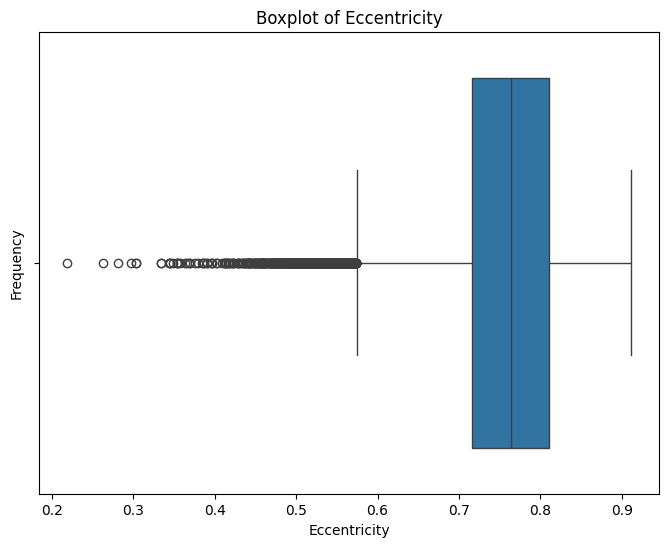

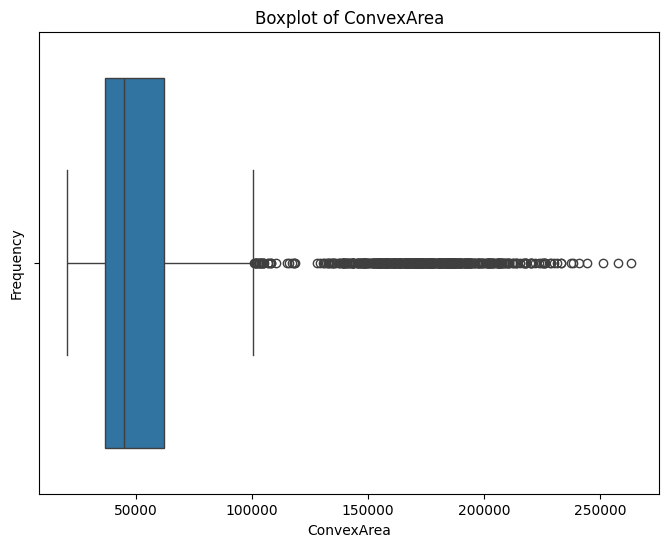

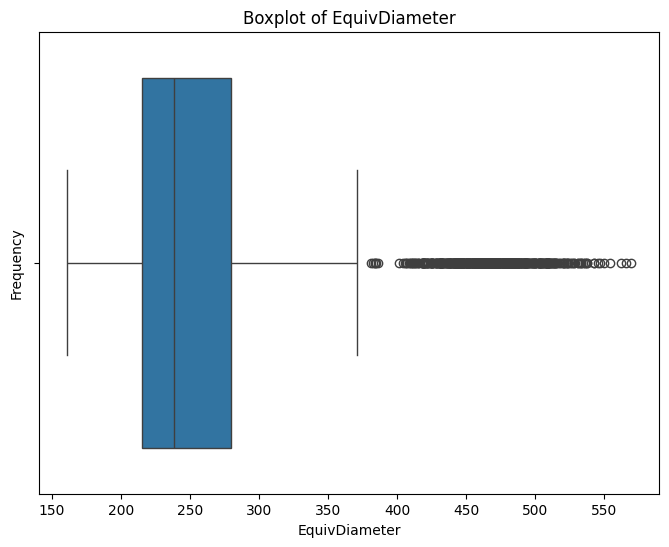

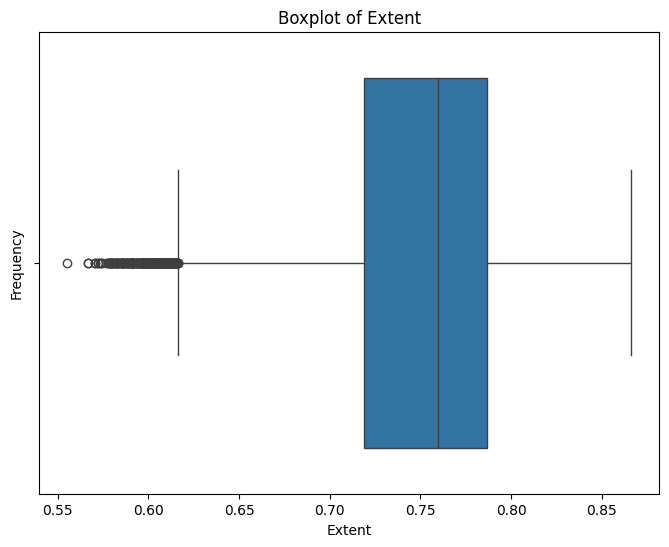

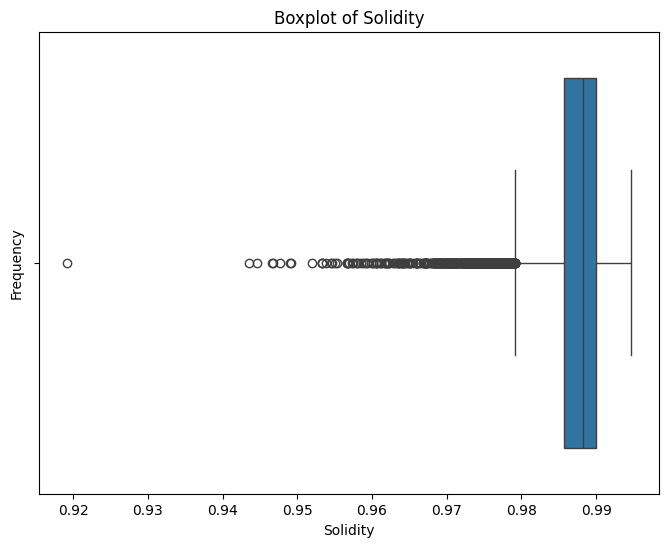

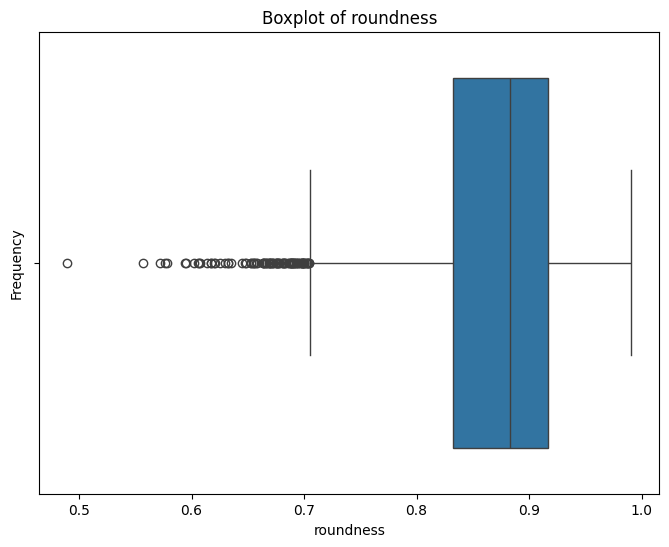

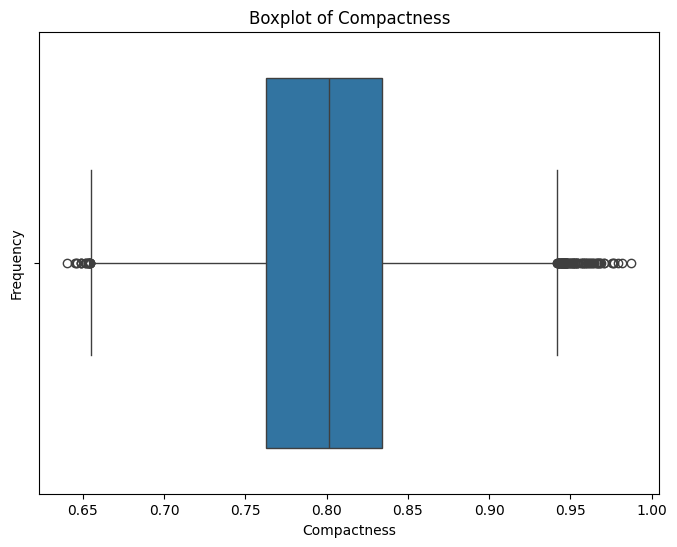

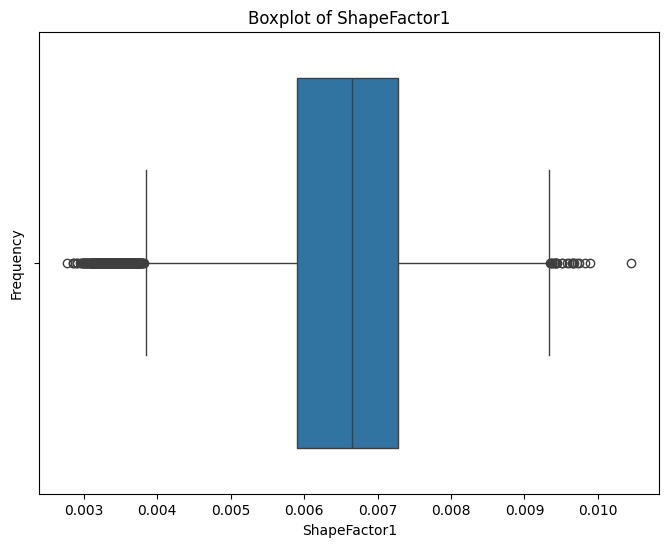

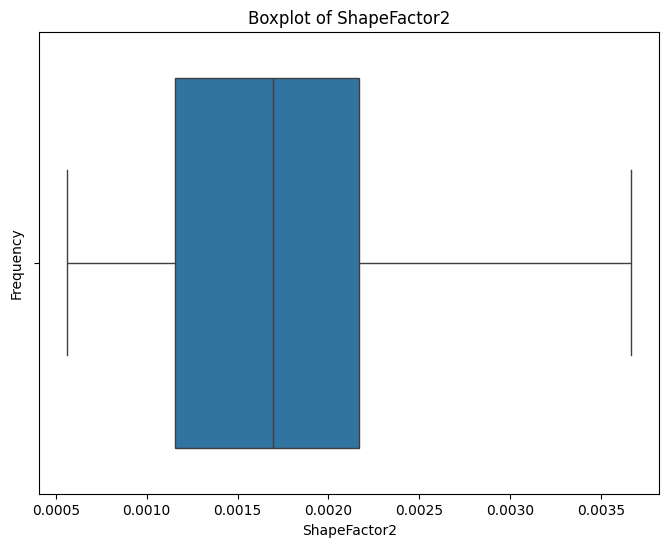

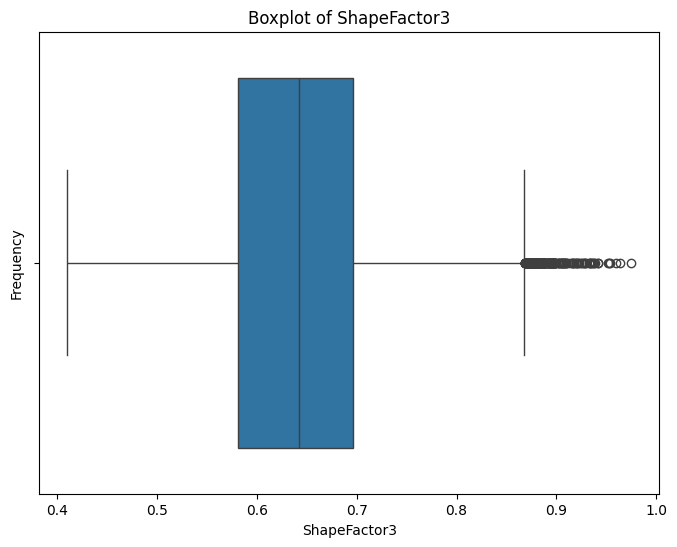

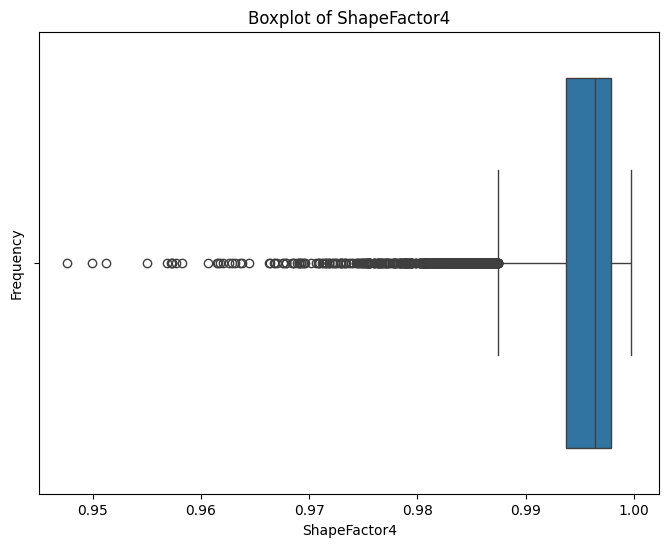

In [49]:
#boxplot for numerical colomns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=data)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

From the boxplot
1. We can see few outliers present in all colomns except ShapeFactor2


In [50]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Function to cap outliers using IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound) #This replaces values outside bounds
    return df

# Apply outlier removal to numerical columns
for col in data.select_dtypes(include=np.number):
    data = remove_outliers_iqr(data, col)
    #data_capped = cap_outliers(data, col) #Now this function is defined


In [51]:
# Apply log transformation to columns with outliers
for col in data.select_dtypes(include=np.number):
    # Add a small constant to handle zero values
    data[col] = np.log1p(data[col])

1. Capping (Winsorization)
What it does:

* Replaces extreme values (outliers) with nearby percentile values (e.g., 5th and 95th percentiles).

* Left-tail capping: Values below the 5th percentile → set to 5th percentile.

* Right-tail capping: Values above the 95th percentile → set to 95th percentile.

* When to use:

   * Outliers are errors (e.g., sensor glitches).

   * You want to preserve data size (no deletions).
2. Log Transform


* Applies a logarithm (e.g., natural log ln(x)) to compress large values.

* Formula: X_new = log(X + 1) (to handle zeros).

* When to use:

  * Data is right-skewed (long tail on the right).

  * Outliers are natural but extreme (e.g., income, bean sizes).   

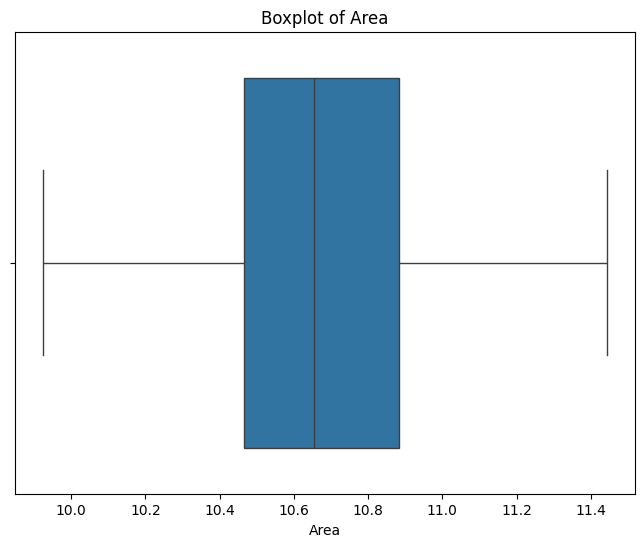

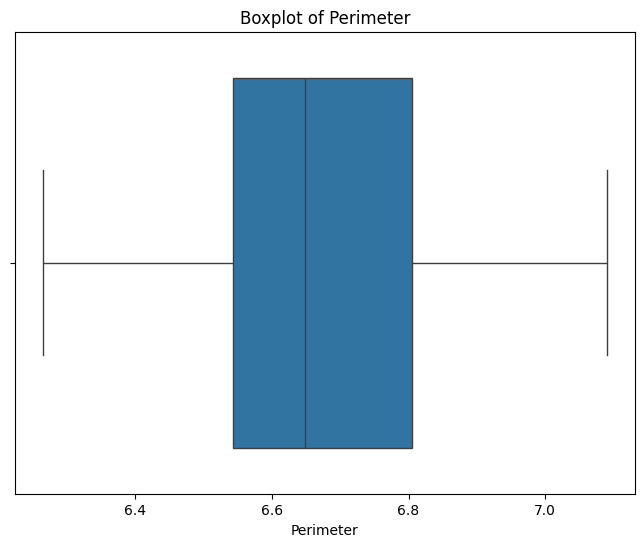

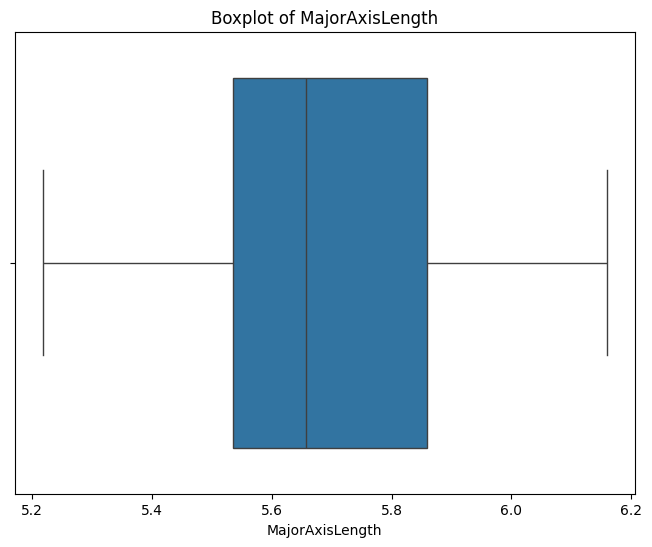

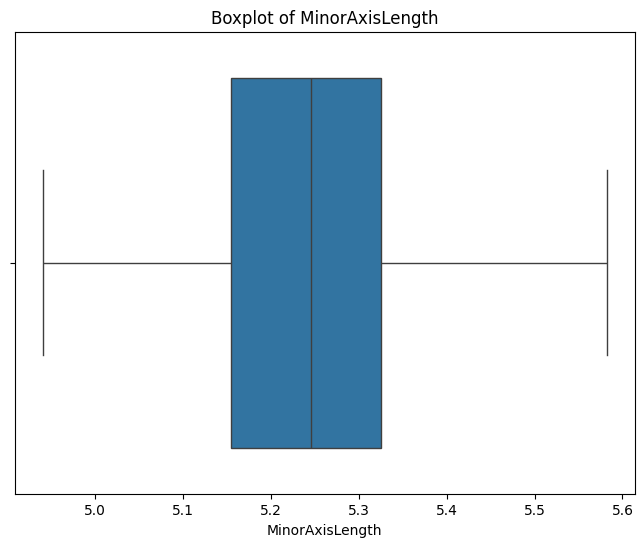

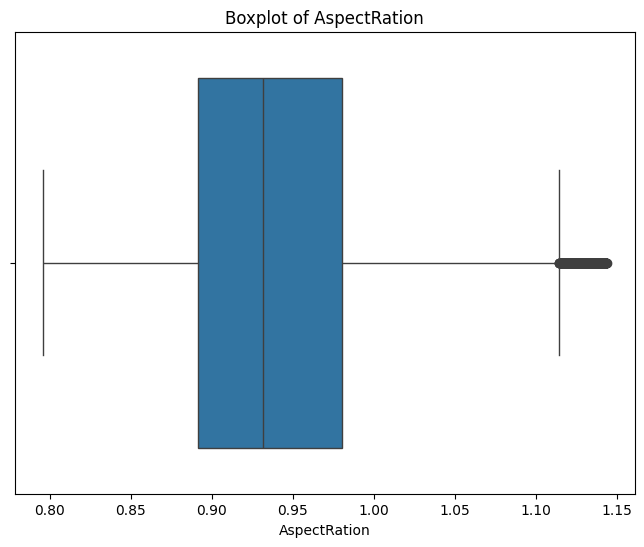

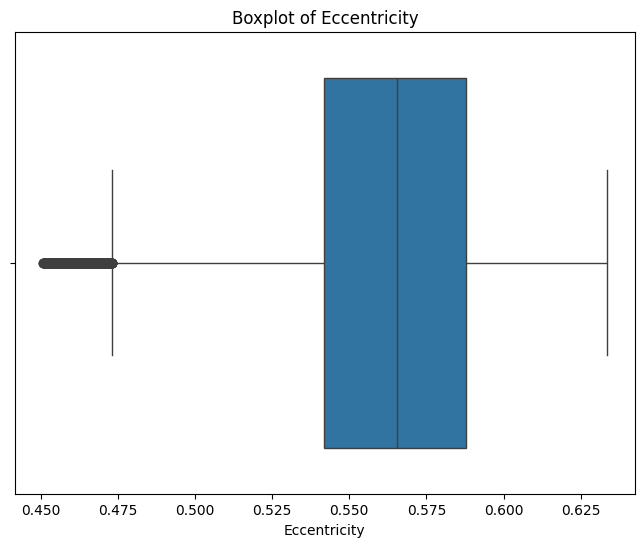

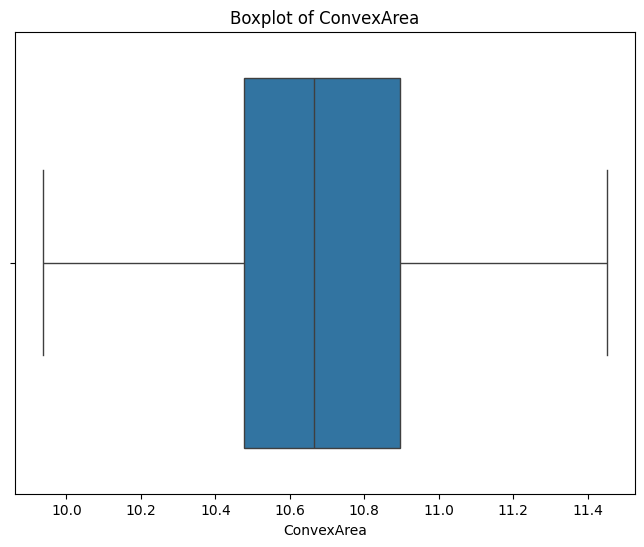

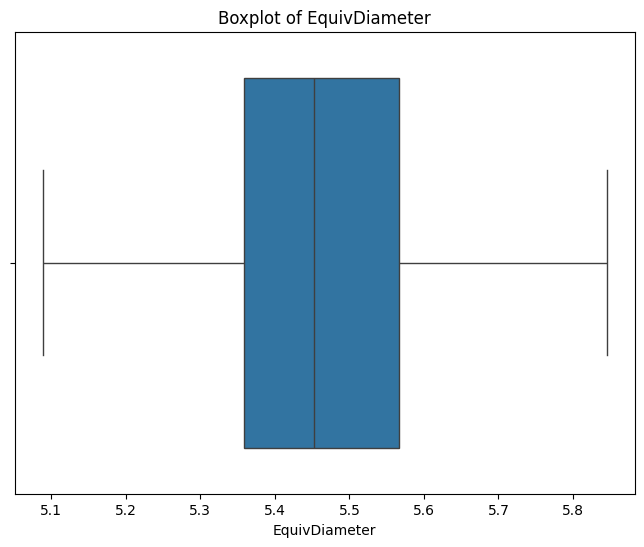

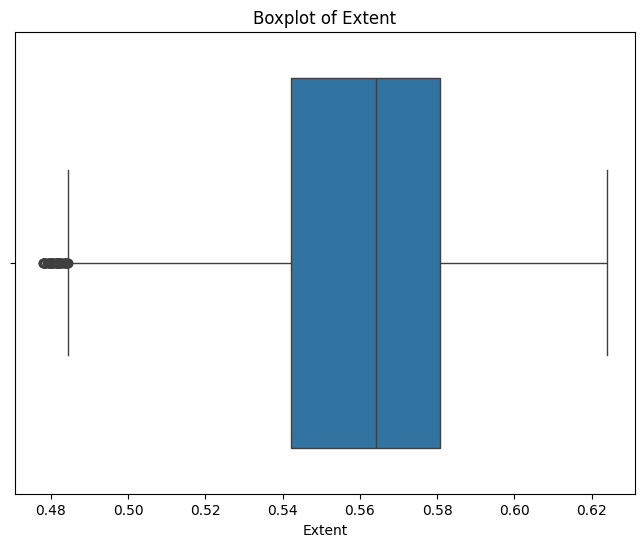

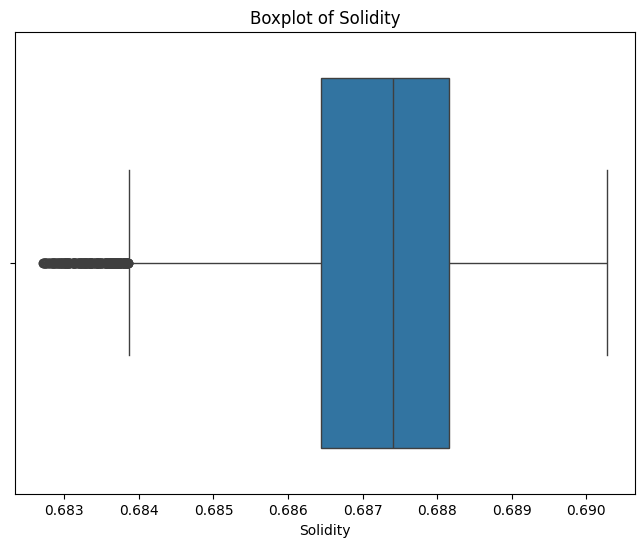

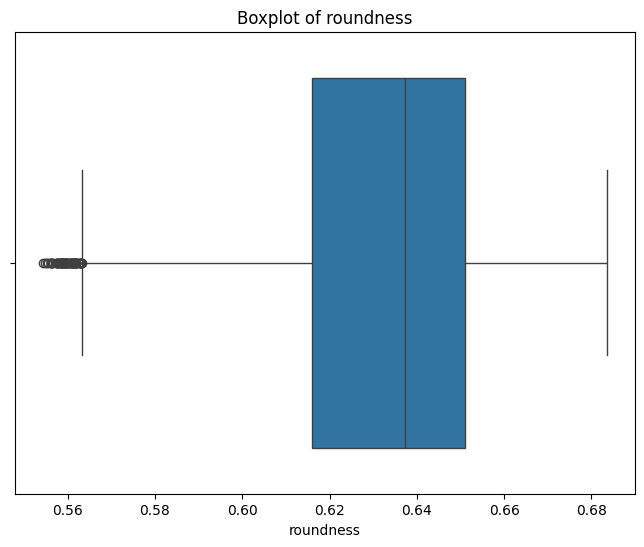

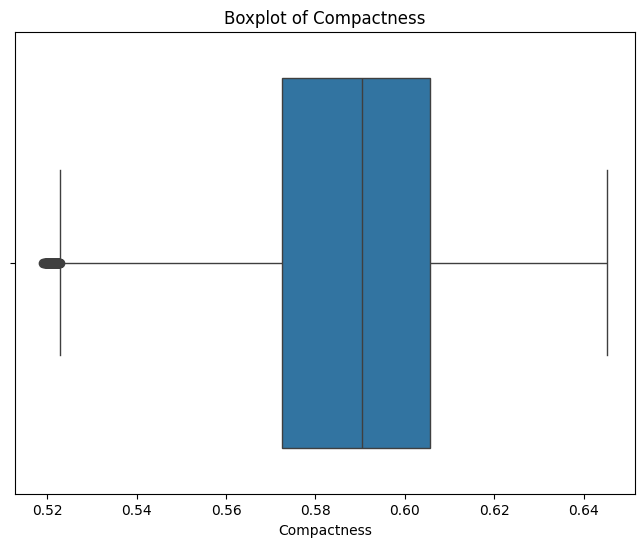

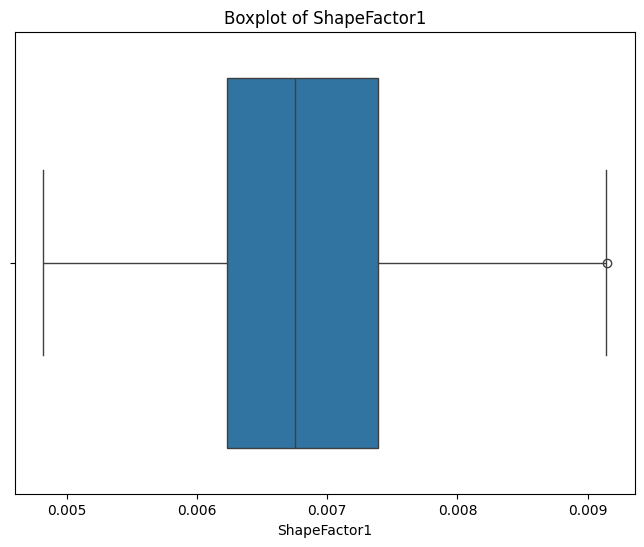

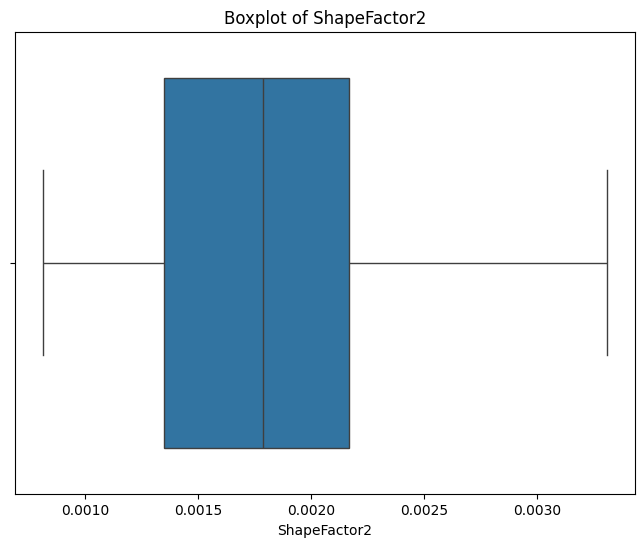

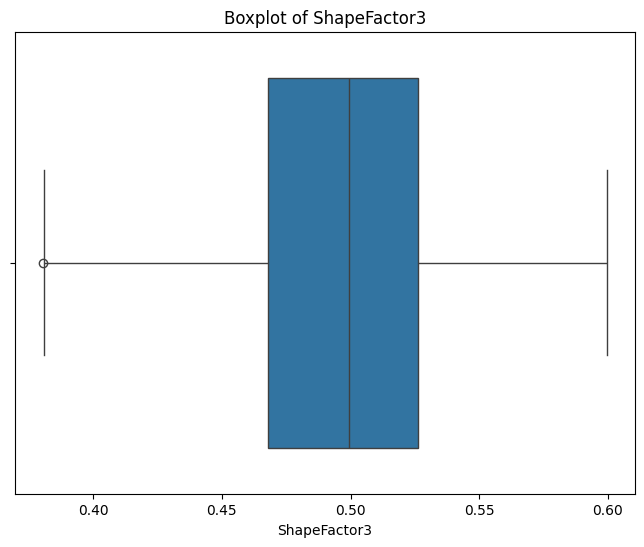

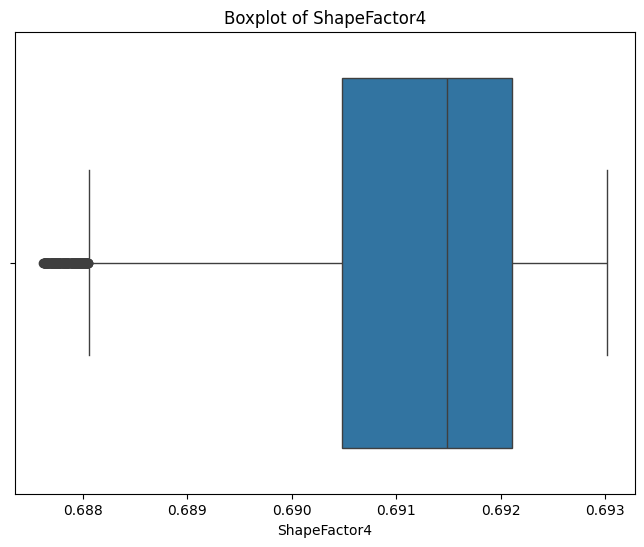

In [52]:
# Boxplot for all numerical columns
for col in data.select_dtypes(include=np.number):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=data)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


1. So most of the outliers are fixed but there a outliers in few features


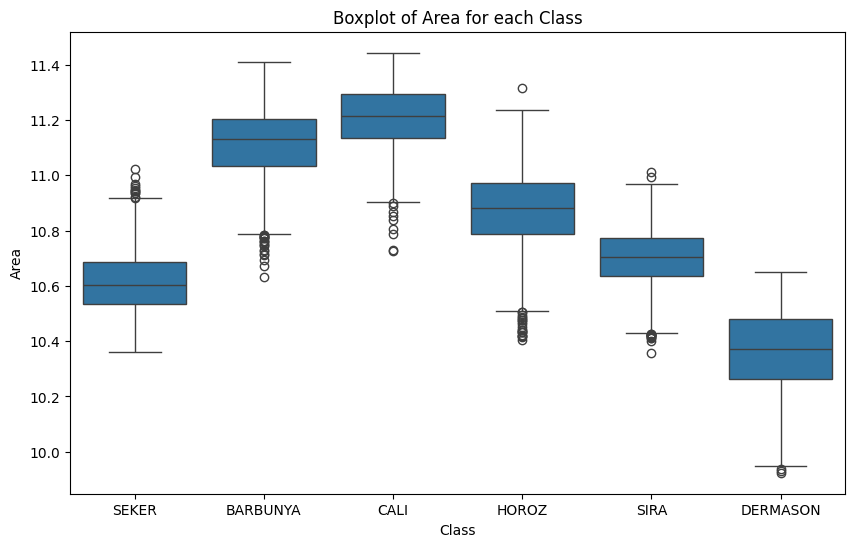

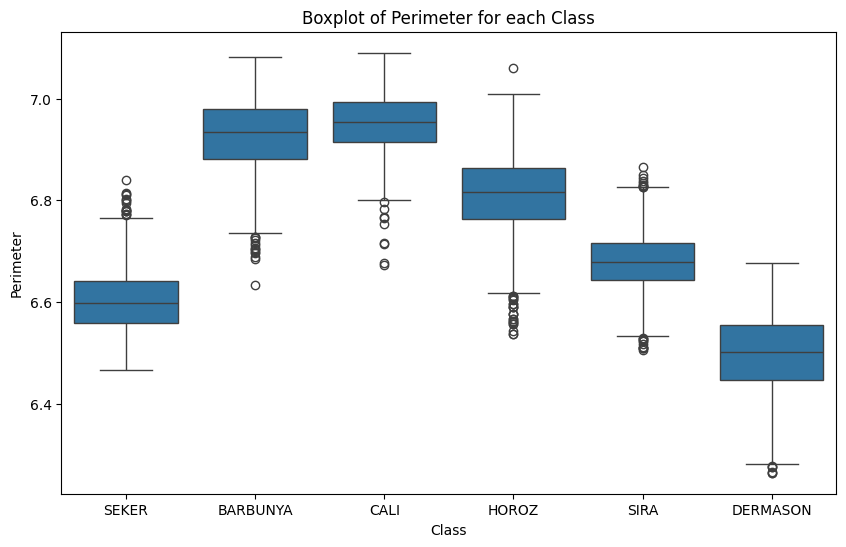

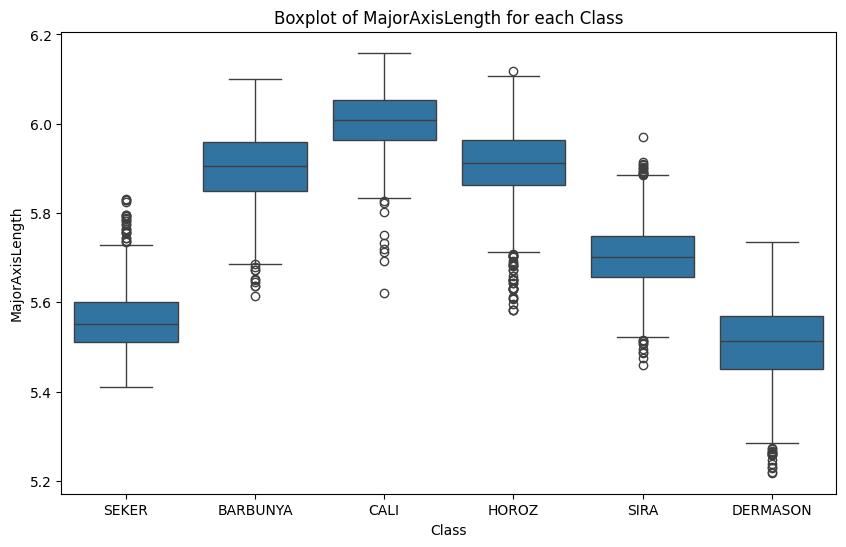

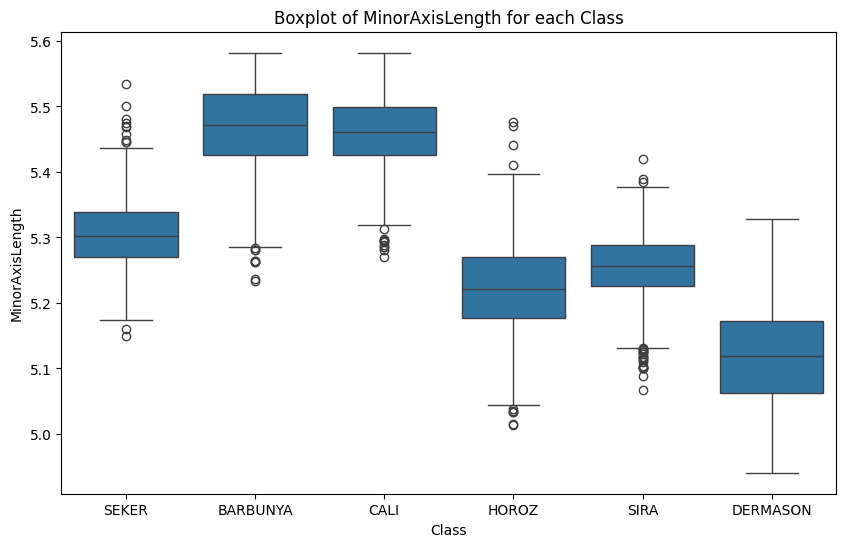

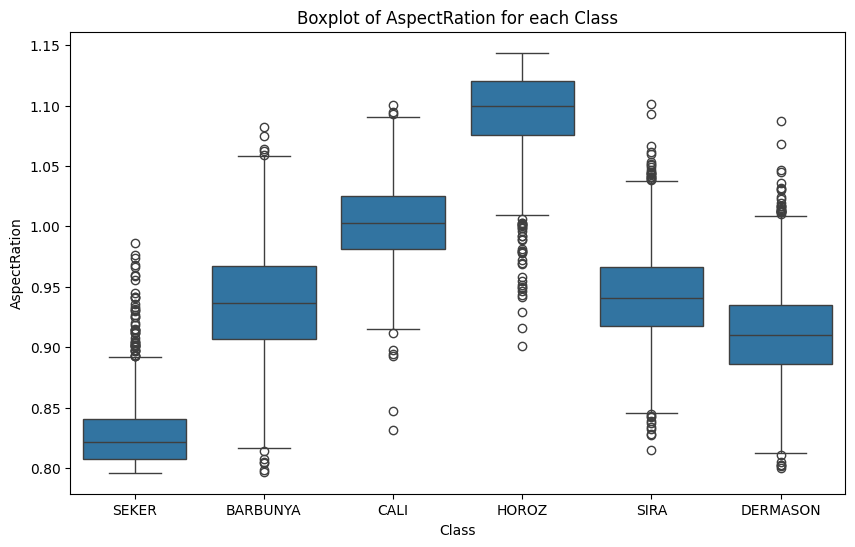

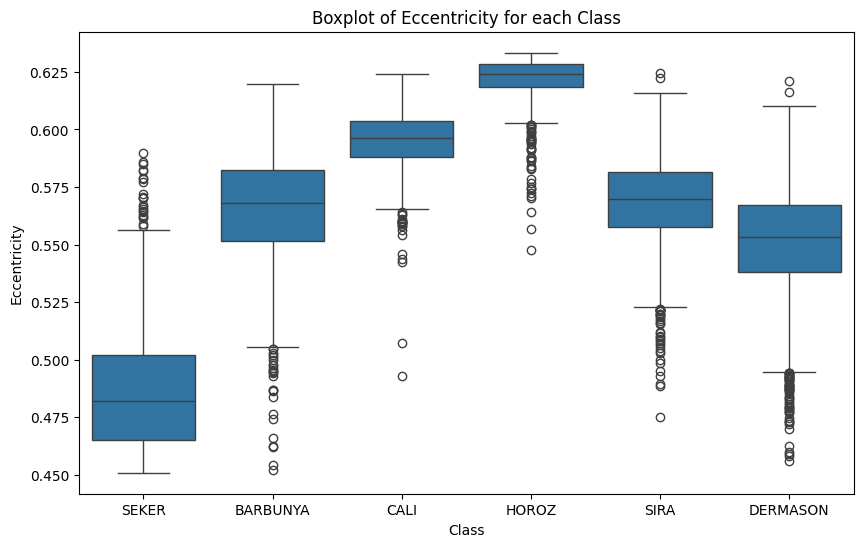

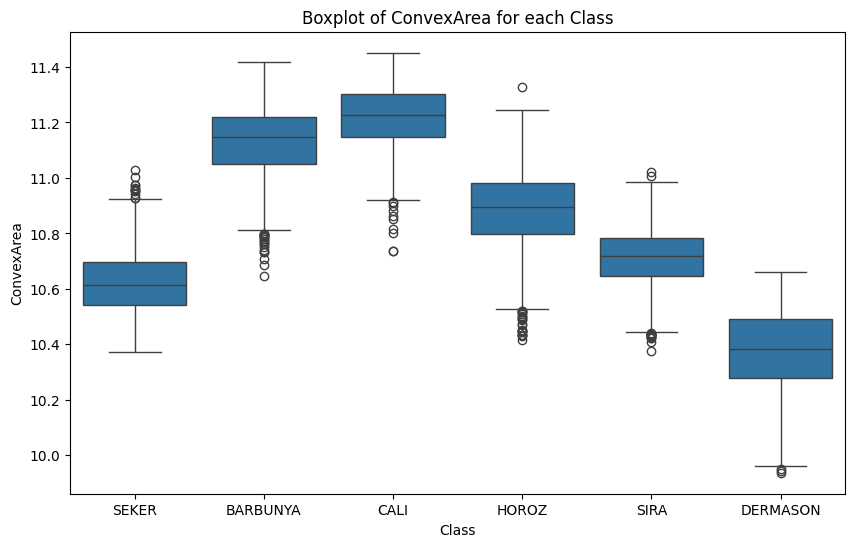

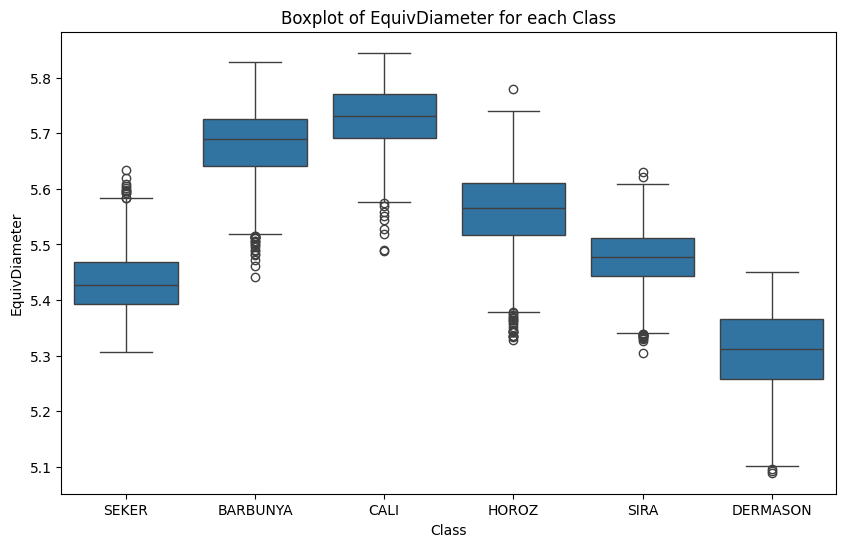

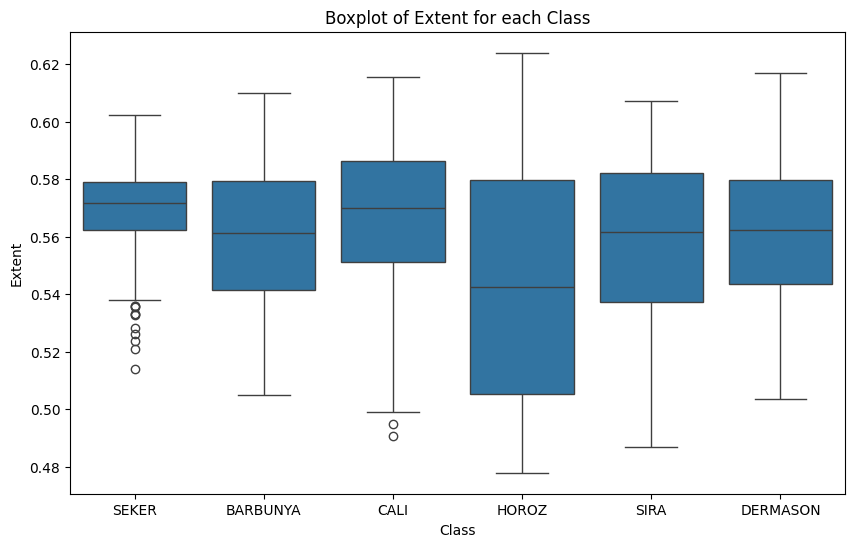

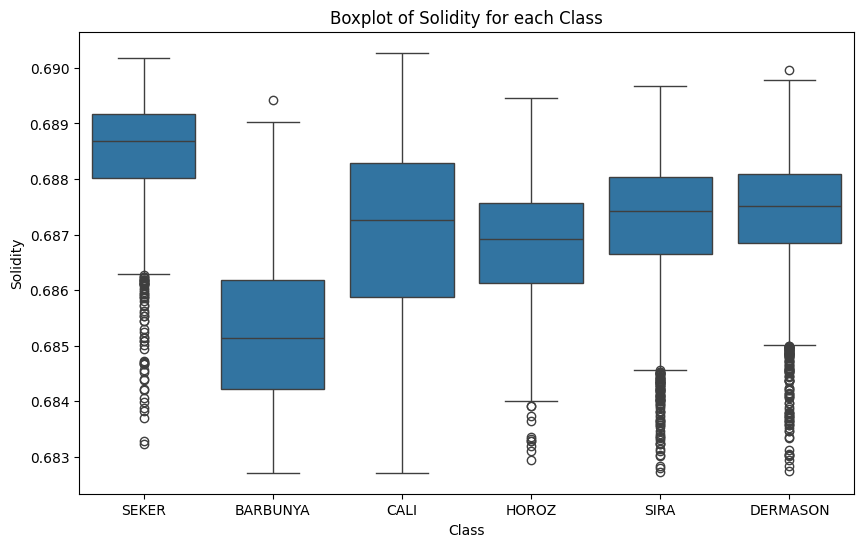

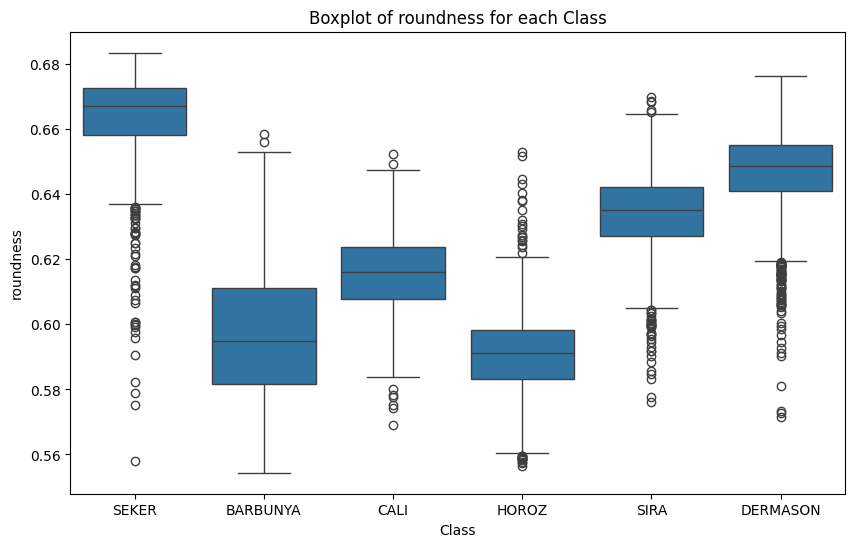

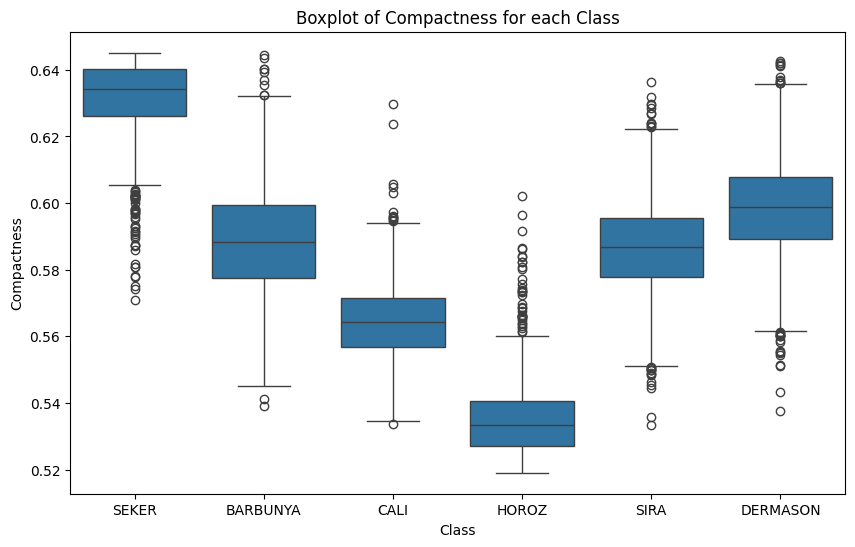

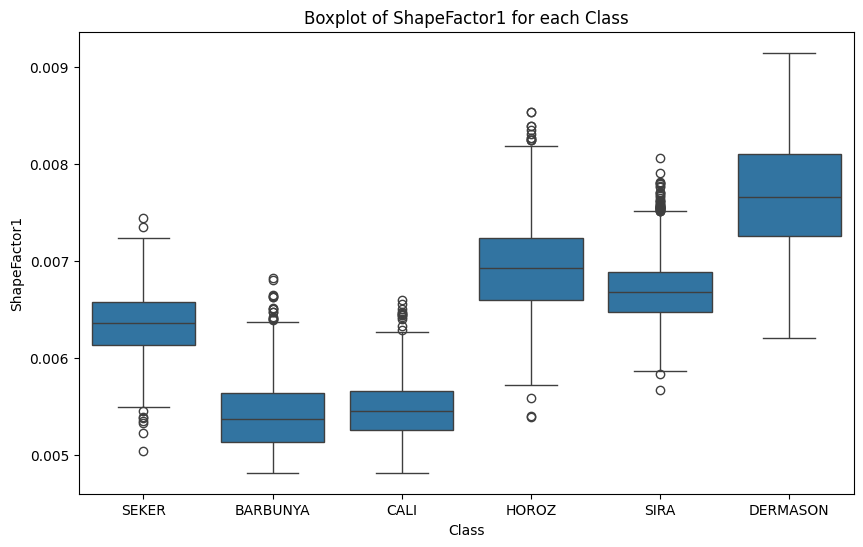

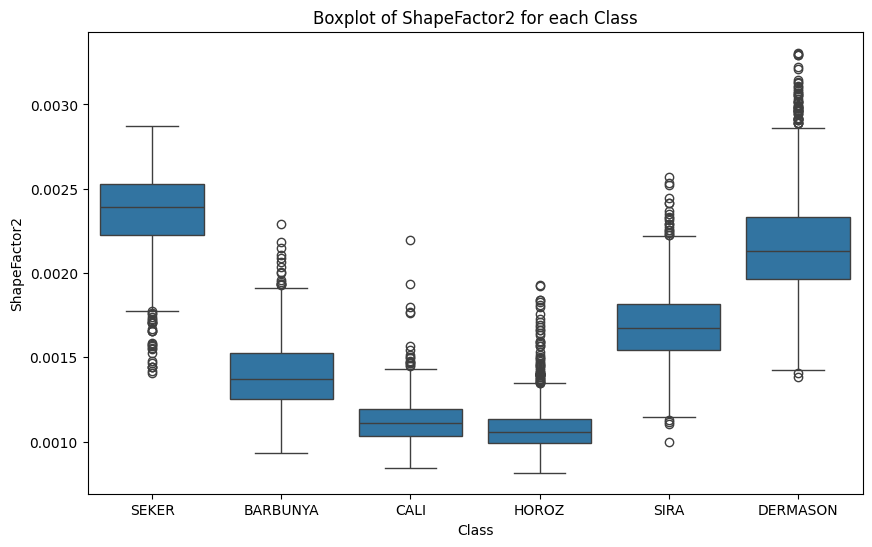

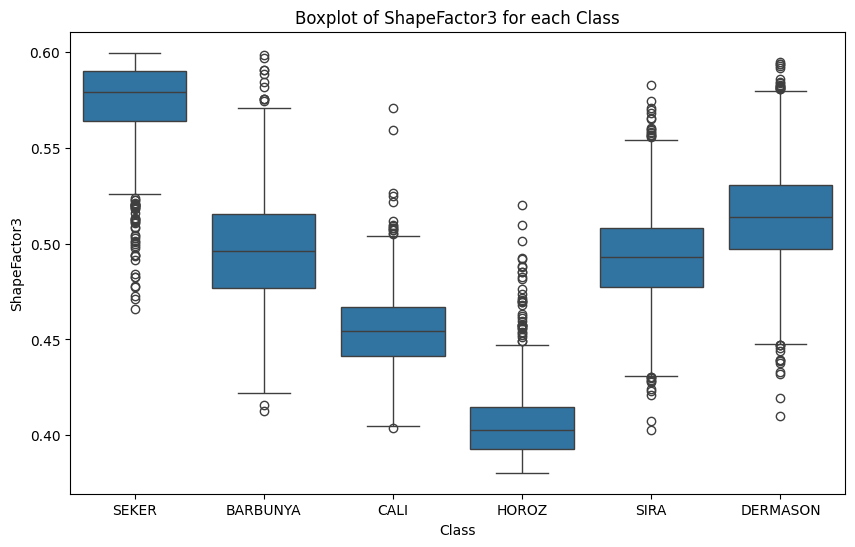

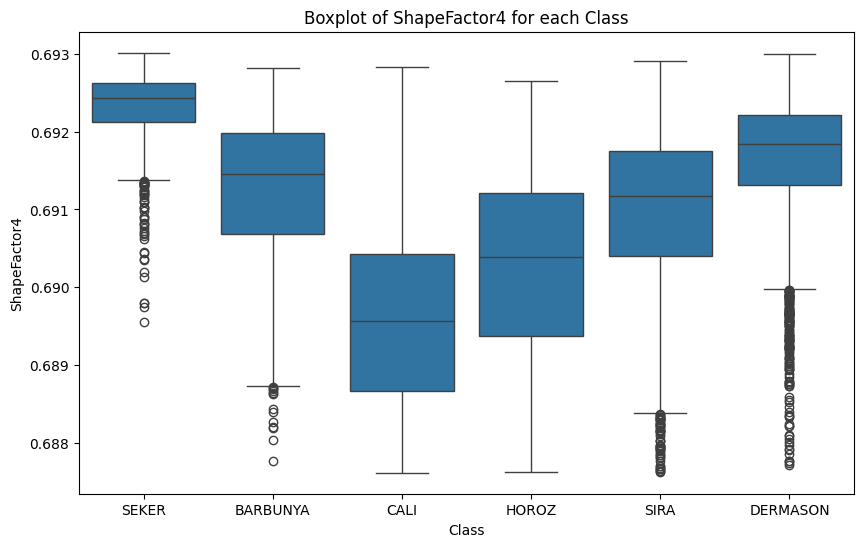

In [53]:
# List of numerical features (excluding 'Class')
numerical_features = data.select_dtypes(include=np.number)

# Loop through each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Class', y=feature, data=data)
    plt.title(f'Boxplot of {feature} for each Class')
    plt.xlabel('Class')
    plt.ylabel(feature)
    plt.show()

1. Since there were still outliers present we plotted a boxplot to observe outliers for each input feature for each class.
2. So as for few clases there are no outliers and few have outliers for a same input feature this might not be an outliers and just valid data point.

In [54]:
#Finding the value counts of class
data['Class'].value_counts()

,count
Class,
DERMASON,3442
SIRA,2552
SEKER,1244
HOROZ,1107
CALI,1067
BARBUNYA,932


In [55]:
# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Class' column
data['Class'] = le.fit_transform(data['Class'])

# Now 'Class' column contains encoded numerical labels
print(data['Class'].value_counts())

Class
2    3442
5    2552
4    1244
3    1107
1    1067
0     932
Name: count, dtype: int64


In [56]:
# Displaying data types of all columns
data.dtypes

,0
Area,float64
Perimeter,float64
MajorAxisLength,float64
MinorAxisLength,float64
AspectRation,float64
Eccentricity,float64
ConvexArea,float64
EquivDiameter,float64
Extent,float64
Solidity,float64


In [57]:
#Print the duplicated rows
data[data.duplicated()]

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
5505,10.419868,6.556716,5.629674,5.045395,1.029206,0.604994,10.434821,5.335530,0.592433,0.685698,0.616470,0.556325,0.008247,0.001566,0.440774,0.691343,3
5509,10.432791,6.576121,5.628946,5.058513,1.020273,0.602112,10.446422,5.341961,0.587499,0.686355,0.604616,0.559401,0.008136,0.001590,0.445926,0.691569,3
5548,10.556542,6.629790,5.728585,5.085073,1.067733,0.616149,10.565505,5.403551,0.586105,0.688675,0.612031,0.543252,0.007945,0.001333,0.419172,0.690095,3
5623,10.644925,6.712791,5.823553,5.081628,1.133608,0.631367,10.659469,5.447549,0.521698,0.685901,0.577155,0.522163,0.008000,0.001095,0.385360,0.688396,3
5631,10.649156,6.704715,5.817701,5.087207,1.125836,0.629781,10.659304,5.449655,0.606524,0.688086,0.586154,0.525419,0.007920,0.001119,0.390495,0.690631,3
5659,10.671278,6.704892,5.796769,5.133502,1.080687,0.619488,10.685355,5.460670,0.529254,0.686133,0.595867,0.538645,0.007587,0.001218,0.411674,0.688908,3
5679,10.686178,6.730652,5.829982,5.114463,1.115655,0.627627,10.701963,5.468088,0.538700,0.685286,0.579567,0.527955,0.007727,0.001119,0.394517,0.689277,3
5683,10.688416,6.718213,5.828665,5.116545,1.113360,0.627129,10.701783,5.469202,0.600275,0.686486,0.591597,0.528957,0.007700,0.001126,0.396110,0.690007,3
5721,10.707975,6.725178,5.808348,5.153051,1.075377,0.618142,10.719626,5.478941,0.527154,0.687338,0.594108,0.541455,0.007400,0.001220,0.416240,0.691610,3
5808,10.751435,6.761437,5.874877,5.130221,1.135361,0.631717,10.763420,5.500582,0.575617,0.687173,0.581158,0.522889,0.007573,0.001043,0.386502,0.691462,3


1. We can observe that there are 41 rows with duplicate values

In [58]:
#Find the no. of duplicate rows
data.duplicated().sum()

np.int64(41)

In [59]:
#Drop duplicate colomns
data_clean = data.drop_duplicates()

1. So droping duplicate colomns to aviod biasing or overfitting

In [60]:
#Print the colomns and rows in dataset
data.shape

(10344, 17)

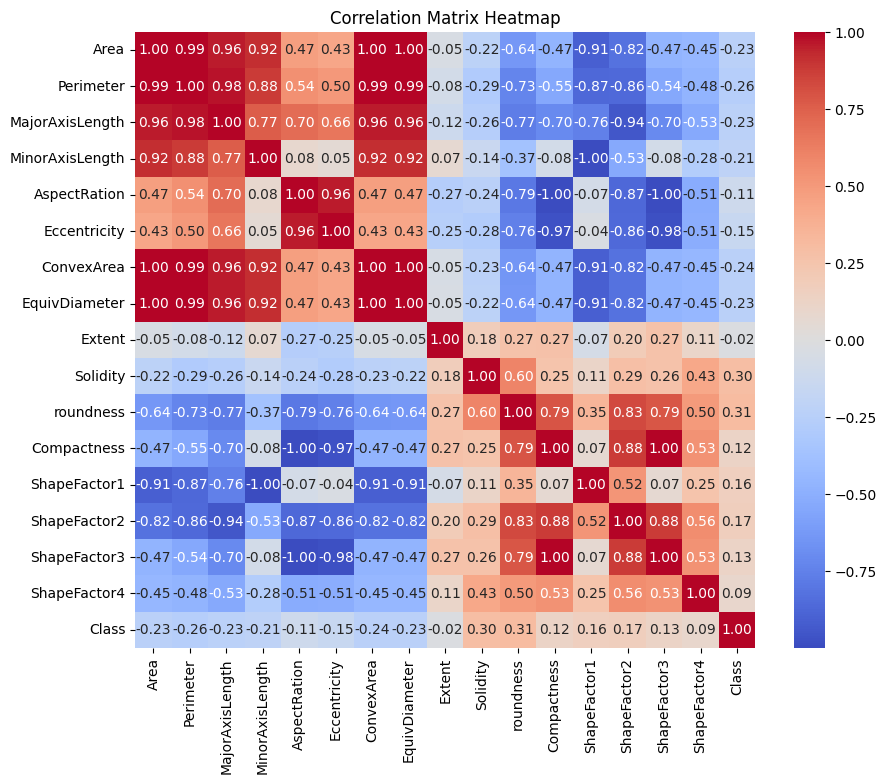

In [61]:
# Calculate the correlation matrix
correlation_matrix = data_clean.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

1. From correlation heatmap
  * We can observe many input features are highly correlated to each other such as Area,	Perimeter,	MajorAxisLength,	MinorAxisLength,	AspectRation,	Eccentricity,	ConvexArea,	EquivDiameter, ShapeFactor3,
  Compactness so to reduce multicolinearity we perform feature engineering or we can drop unneccesary colomns

In [62]:
# Drop the specified columns
data_clean = data_clean.drop(['AspectRation', 'ShapeFactor3', 'Eccentricity'], axis=1)


In [63]:
# Drop specified columns
#columns_to_drop = ['AspectRation', 'Drop Area', 'ConvexArea', 'EquivDiameter', 'MinorAxisLength', 'ShapeFactor3']
#data_clean = data_clean.drop(columns=columns_to_drop, errors='ignore')


In [64]:
# Seperating features (X) and target (y)
X = data_clean.drop('Class', axis=1)
y = data_clean['Class']

In [65]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs']  # Optimization algorithm
}

# Initialize Logistic Regression model
logreg = LogisticRegression()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')  # Use 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_logreg_model = grid_search.best_estimator_

print(f"Best hyperparameters: {best_params}")

# Train the Logistic Regression model with the best hyperparameters
best_logreg_model.fit(X_train, y_train)


Best hyperparameters: {'C': 100, 'solver': 'lbfgs'}


LogisticRegression(C=100)

1. C: This is the inverse of the regularization strength. Smaller values mean stronger regularization.

  * Helps prevent overfitting by penalizing large coefficients.

  * Trying a range of values (from 0.001 to 100) helps find the best balance.

2. solver: These are different algorithms used to find the best model parameters.

  * 'liblinear': Good for small datasets and L1 regularization.

  * 'saga': Supports both L1 and L2 penalties, works well on large datasets.

  * 'newton-cg' and 'lbfgs': Better for larger datasets, work only with L2 penalty.
3. GridSearchCV: Automates testing all combinations of hyperparameters from param_grid.

  * cv=5: Uses 5-fold cross-validation:
     * Splits the training data into 5 parts.
     * Trains on 4 parts and validates on the remaining 1.
     * Repeats this process 5 times (each fold acts as validation once).

  * scoring='accuracy': Uses accuracy as the metric to evaluate performance
4. grid_search.best_params_: Shows the best combination of C and solver that gave the highest accuracy.

5. grid_search.best_estimator_: Gives the actual trained Logistic Regression model with those optimal hyperparameters.  

In [68]:
# Make predictions on the test set
y_pred = best_logreg_model.predict(X_test)
y_prob = best_logreg_model.predict_proba(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

# Check if the problem is binary or multi-class
if len(best_logreg_model.classes_) == 2:
    # For binary classification, calculate ROC AUC using the positive class probabilities
    roc_auc = metrics.roc_auc_score(y_test, y_prob[:, 1])
else:
    # For multi-class classification, use 'ovr'
    roc_auc = metrics.roc_auc_score(y_test, y_prob, multi_class='ovr')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.9063561377971858
Precision: 0.9073713321387283
Recall: 0.9063561377971858
F1-score: 0.9066906417391621
ROC-AUC: 0.9930528945455354


* accuracy: Proportion of correct predictions (overall performance).

* precision: Measures how many predicted positives are actually positive.

* recall: Measures how many actual positives were correctly identified.

* f1: Harmonic mean of precision and recall — balances the two.

* best_logreg_model.classes_: Gives the list of unique class labels in the model.

  * Length 2 means it's a binary classification problem.

* roc_auc_score: Measures how well the model separates classes:

  * Higher = better (1.0 = perfect, 0.5 = random).

* Binary case:

  * Use only the probabilities for the positive class (y_prob[:, 1]).

* Multi-class case:

  * Use multi_class='ovr' (one-vs-rest): calculates the ROC-AUC for each class vs. all others.

🔹 Accuracy: 0.906
\
About 90.6% of test samples were correctly classified.
✅ High accuracy means overall good prediction performance.

🔹 Precision: 0.907
When the model predicts a certain class, it is correct about 90.7% of the time.
✅ High precision means few false positives (i.e., the model doesn't "guess" wrong often).

🔹 Recall: 0.906
The model correctly identified 90.6% of the actual positive instances (or correctly found members of each class).
✅ High recall means the model is sensitive and doesn’t miss many correct cases.

🔹 F1 Score: 0.907
This is the harmonic mean of precision and recall. At ~0.907, it shows that your model has a good balance between the two.
✅ It’s particularly useful if your classes are imbalanced or if you care about both precision and recall equally.

🔹 ROC-AUC: 0.993
The model is extremely good at ranking positive instances higher than negative ones. An AUC of 0.993 is very close to perfect (1.0).
✅ This tells us the model separates classes exceptionally well.
Even if classes are imbalanced, a high AUC means the model distinguishes them reliably.



In [69]:
# TESTING ACCURACY AND TRAINING ACCURACY print

print(f"Training Accuracy: {best_logreg_model.score(X_train, y_train)}")
print(f"Testing Accuracy: {accuracy}")


Training Accuracy: 0.9166464450376123
Testing Accuracy: 0.9063561377971858


There is no much difference between Testing accuracy, and training accuracy so the model is optmial and there is no overfitting or underfitting issues

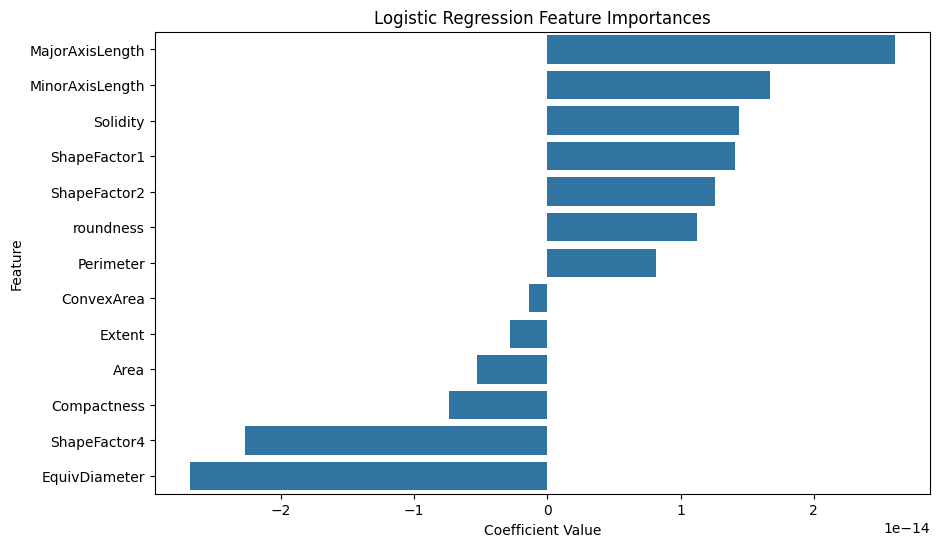

In [70]:
# Get feature importances (coefficients)
feature_importances = best_logreg_model.coef_
#feature_importances = logreg.coef_
#Average coefficients across classes if it's multi-class
if len(feature_importances) > 1:
    feature_importances = np.mean(feature_importances, axis=0)

# Create a DataFrame to visualize coefficients
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

# Visualize coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df)
plt.title('Logistic Regression Feature Importances')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In Logistic Regression, coefficients (coef_) represent the importance and direction of each feature.

A positive coefficient increases the odds of being in a class.

A negative coefficient decreases the odds.

1. MajorAxisLength is the most influential feature (top of the list), suggesting it has the strongest impact on the model's predictions.

2. Other significant features include MinorAxisLength, Solidity, ShapeFactor1, ShapeFactor2, and roundness, which are likely important in distinguishing the target classes.

3. Less Important Features:
Features like Perimeter, ConvexArea, Extent, Area, Compactness, ShapeFactor4, and EquivDiameter appear lower in the list, indicating they contribute less to the model's decision-making.

4. The coefficients are small (around 1e–14), which suggests that the model's feature weights are minimal. This could imply features are weakly predictive.